In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

%matplotlib inline

In [2]:
xs = np.linspace(-500, 500, 1000)

In [3]:
def f(x):
    return -x**2

ys = f(xs)

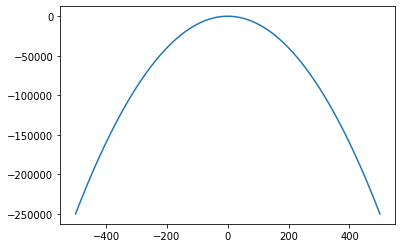

In [4]:
plt.plot(xs, ys)

In [26]:
def coordinate_ascent_1D(xs, f, T=1000, step=20):
    random_start = xs[0]
    
    initial_params = [random_start]
    ys = f(xs)
    
    
    ax = plt.axes()
    ax.plot(xs, ys, alpha=0.5)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    
    for _ in range(T):
        initial_param_step_up = initial_params[-1] + step
        itinial_param_step_down = initial_params[-1] - step
        
        if f(initial_param_step_up) > f(initial_params[-1]):
            initial_params.append(initial_param_step_up)
        elif f(itinial_param_step_down) > f(initial_params[-1]):
            initial_params.append(itinial_param_step_down)
        
        """
        ax.arrow(
            initial_params[-1],
            f(initial_params[-1]),
            initial_params[-2] - initial_params[-1],
            f(initial_params[-2]) - f(initial_params[-1]),
            color="red",
            antialiased=True,
            linewidth=3
        )
        """
        
        ax.scatter(
            initial_params[-1],
            f(initial_params[-1]),
            color="red"
        )

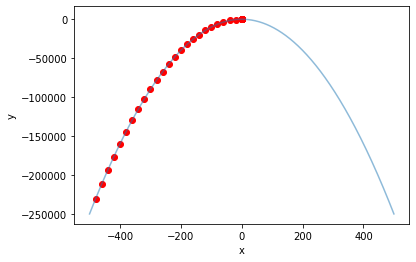

In [27]:
coordinate_ascent_1D(xs, f)

In [28]:
xs = np.linspace(-500, 500, 1000)
ys = np.linspace(-500, 500, 1000)
X, Y = np.meshgrid(xs, ys)

Z = -(X**2 + Y**2)

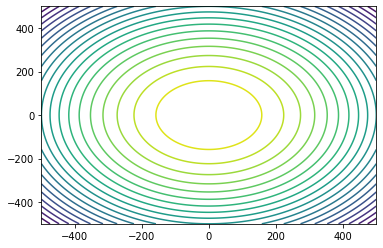

In [9]:
plt.contour(X, Y, Z, levels=20)

In [29]:
def coordinate_ascent_2D(xs, ys, T=1000, step=100):
    def f(xs, ys):
        return -(xs**2 + ys**2)
    
    zs = f(xs, ys)
    
    X, Y = np.meshgrid(xs, ys)
    
    Z = -(X**2 + Y**2)
    
    random_start_x = xs[0]
    random_start_y = ys[0]
    
    initial_params_x = [random_start_x]
    initial_params_y = [random_start_y]
    
    ax = plt.axes()
    ax.contour(X, Y, Z, levels=20)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    
    for _ in range(T):
        def evaluate_fx(x_param):
            return f(x_param, initial_params_y[-1])
        
        can_continue = True
        
        while can_continue:
            initial_param_step_up = initial_params_x[-1] + step
            itinial_param_step_down = initial_params_x[-1] - step

            if evaluate_fx(initial_param_step_up) > evaluate_fx(initial_params_x[-1]):
                initial_params_x.append(initial_param_step_up)
            elif evaluate_fx(itinial_param_step_down) > evaluate_fx(initial_params_x[-1]):
                initial_params_x.append(itinial_param_step_down)
            elif evaluate_fx(itinial_param_step_down) < evaluate_fx(initial_params_x[-1]) and evaluate_fx(initial_param_step_up) < evaluate_fx(initial_params_x[-1]):
                can_continue = False
                
            ax.scatter([initial_params_x[-1]], [initial_params_y[-1]], color="red")
            
        def evaluate_fy(y_param):
            return f(initial_params_x[-1], y_param)
        
        can_continue = True
        
        while can_continue:
            initial_param_step_up = initial_params_y[-1] + step
            itinial_param_step_down = initial_params_y[-1] - step

            if evaluate_fy(initial_param_step_up) > evaluate_fy(initial_params_y[-1]):
                initial_params_y.append(initial_param_step_up)
            elif evaluate_fy(itinial_param_step_down) > evaluate_fy(initial_params_y[-1]):
                initial_params_y.append(itinial_param_step_down)
            elif evaluate_fy(itinial_param_step_down) < evaluate_fy(initial_params_y[-1]) and evaluate_fy(initial_param_step_up) < evaluate_fy(initial_params_y[-1]):
                can_continue = False
                
            ax.scatter([initial_params_x[-1]], [initial_params_y[-1]], color="red")
        
        """
        ax.arrow(
            initial_params[-1],
            f(initial_params[-1]),
            initial_params[-2] - initial_params[-1],
            f(initial_params[-2]) - f(initial_params[-1]),
            color="red",
            antialiased=True,
            linewidth=3
        )
        """
        


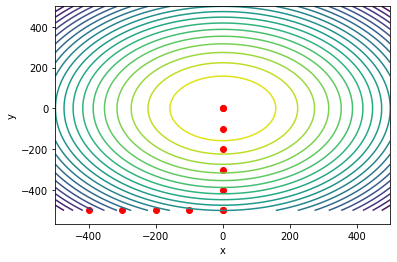

In [30]:
coordinate_ascent_2D(xs, ys, T=1)